### DATE - 6th September 2022

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('All_transation.csv')
df.head()

,ATId,BusinessId,DeviceCode,TransactionID,AssociateRefTxnId,ProductId,PayModeId,Amount,TxnSource,Status,IsReversed,TransactionDate,EndPointId,StatusCode,UpdatedOn
0,143453104,343554,MAO4SLWN,2205150001320000003,NaN,49,1,666.0,2,3,1,2022-05-15 00:01:32.453,47,201,2022-05-15 00:01:33.850
1,143453105,343050,MADRKA0,2205150002320000005,NaN,51,1,479.0,2,2,2,2022-05-15 00:02:32.047,6,NaN,2022-05-15 00:02:57.303
2,143453106,190431,AS55HE7M,2205150003490000010,NaN,3039,1,0.0,2,3,3,2022-05-15 00:03:49.210,64,NaN,2022-05-15 00:03:49.570
3,143453107,190431,AS55HE7M,2205150003580000011,NaN,3039,1,0.0,2,3,3,2022-05-15 00:03:58.007,64,NaN,2022-05-15 00:03:58.303
4,143453108,190431,AS55HE7M,2205150004220000012,NaN,3039,1,0.0,2,3,3,2022-05-15 00:04:22.217,64,NaN,2022-05-15 00:04:22.467


In [4]:
df.shape

(141002, 15)

In [6]:
df.isnull().sum(axis = 0)

ATId                      0
BusinessId                0
DeviceCode                0
TransactionID             0
AssociateRefTxnId    140078
ProductId                 0
PayModeId                 0
Amount                    0
TxnSource                 0
Status                    0
IsReversed                0
TransactionDate           0
EndPointId                0
StatusCode            68410
UpdatedOn                 5
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141002 entries, 0 to 141001
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ATId               141002 non-null  int64  
 1   BusinessId         141002 non-null  int64  
 2   DeviceCode         141002 non-null  object 
 3   TransactionID      141002 non-null  int64  
 4   AssociateRefTxnId  924 non-null     object 
 5   ProductId          141002 non-null  int64  
 6   PayModeId          141002 non-null  int64  
 7   Amount             141002 non-null  float64
 8   TxnSource          141002 non-null  int64  
 9   Status             141002 non-null  int64  
 10  IsReversed         141002 non-null  int64  
 11  TransactionDate    141002 non-null  object 
 12  EndPointId         141002 non-null  int64  
 13  StatusCode         72592 non-null   object 
 14  UpdatedOn          140997 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 16

## Featurewise Exploratory Data Analysis

### ATId

In [22]:
df['ATId'].value_counts()
# sns.countplot(df['ATId'])
# df['ATId'].describe()

143453104    1
143547110    1
143547104    1
143547105    1
143547106    1
            ..
143500101    1
143500100    1
143500099    1
143500098    1
143594108    1
Name: ATId, Length: 141002, dtype: int64

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ATId'>

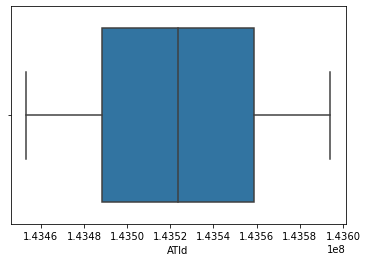

In [63]:
sns.boxplot(df['ATId'])

Observation - we can observe that we have unique ATId from every transaction. It basically means that a unique Id is generated for each transaction. As 141002 transaction, same number of ATId's.

### BusinessId

In [24]:
df['BusinessId'].value_counts()

132764    423
320523    343
367455    287
151699    287
67765     259
         ... 
45775       1
316554      1
81726       1
192678      1
324643      1
Name: BusinessId, Length: 12437, dtype: int64

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessId'>

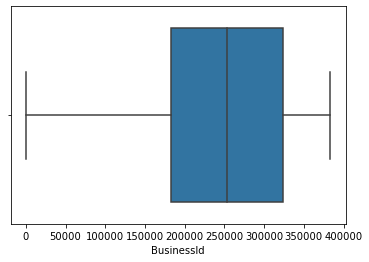

In [62]:
sns.boxplot(df['BusinessId'])

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BusinessId', ylabel='Density'>

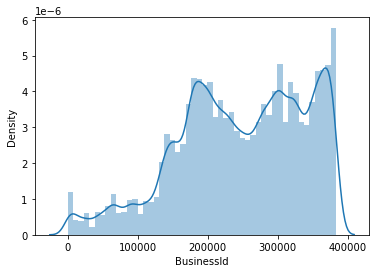

In [31]:
sns.distplot(df['BusinessId'])

### Device Code

In [42]:
df['DeviceCode'].value_counts()

ab8ceed7      423
JR6WIWWA      343
HDANDINN      287
8096010131    258
IILFRUHN      252
             ... 
N7MUURR7        1
AIRAYIS         1
77r7i1t         1
RDMMRRDR        1
IH5UTI5H        1
Name: DeviceCode, Length: 12515, dtype: int64

we can observe here that a mainly a particular device is used for a particular BusinessId by the business agent. But as the count of device code(12515) is more than businessID(12437), it may happen that some device are doing no business, so businessID. 

### Transaction Id

In [37]:
df['TransactionID'].value_counts()

2205151101180049398    2
2205150001320000003    1
2205151707010100604    1
2205151706590100597    1
2205151706590100598    1
                      ..
2205151105140050153    1
2205151105140050152    1
2205151105140050149    1
2205151105140050148    1
2205152359140151261    1
Name: TransactionID, Length: 141001, dtype: int64

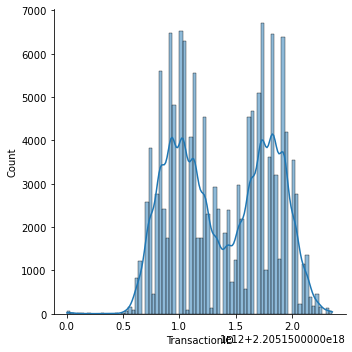

In [40]:
sns.displot(df['TransactionID'],kde= True)

In [44]:
### AssociateRefTxnId
df['AssociateRefTxnId'].value_counts()

Z2022051516525532632CA3    1
1798DH7P                   1
4453868                    1
10934mIrB                  1
1093446my                  1
                          ..
U2205151050270000085       1
PY0071948939               1
5169bLqA                   1
PY0071949511               1
U2205152357250000406       1
Name: AssociateRefTxnId, Length: 924, dtype: int64

They are all unique Id's(924) but also contain a lot of null values. We have to see what this feature signify and why there are more null values to it.

### ProductID

In [16]:
#sns.countplot(df['ProductId'])
df['ProductId'].value_counts()

3041    46101
3039    38328
3047    17826
3037    15550
3046     5133
        ...  
4001        1
100         1
483         1
3033        1
113         1
Name: ProductId, Length: 97, dtype: int64

We can observe from the result that which product is more popular and contribution in most of the business.

### PayModeId

In [77]:
df['PayModeId'].value_counts()

1    141002
Name: PayModeId, dtype: int64

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PayModeId', ylabel='count'>

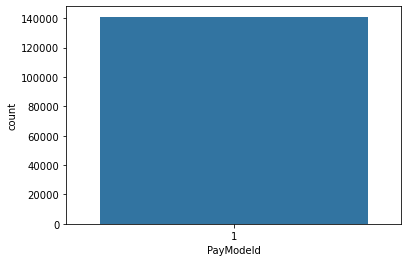

In [14]:
sns.countplot(df['PayModeId'])

This Id is not for all transaction, It basically means if the transaction is intiated, PayModeId is becoming 1. 

### Amount

In [46]:
df['Amount'].value_counts()

0.00        58496
1000.00      6211
5000.00      5693
1.00         4969
10000.00     4406
            ...  
543.00          1
266.00          1
5320.00         1
1293.00         1
7281.26         1
Name: Amount, Length: 2841, dtype: int64

Why there are a lot of zero amount transaction, if the transaction is being intiated but not completed. we must find the suitable cause for this problem. according to me, there can be network issue, failed transaction, etc. but we can conclude anything, it is just an assumption.

In [47]:
df['Amount'].describe()

count    141002.000000
mean       1273.960332
std        2496.554688
min           0.000000
25%           0.000000
50%         155.000000
75%        1500.000000
max      200000.000000
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Amount', ylabel='Count'>

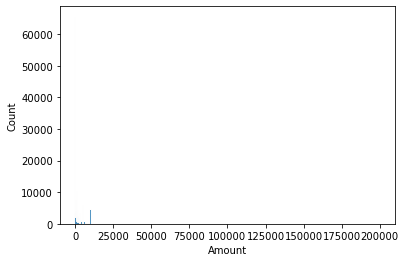

In [78]:
sns.histplot(df['Amount'])

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

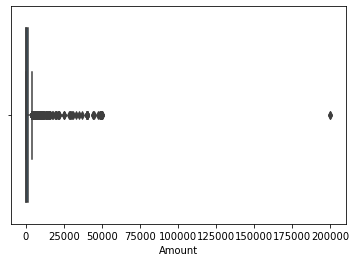

In [64]:
sns.boxplot(df['Amount'])

In [49]:
np.sum(df['Amount'])

179630954.73000002

### TxnSource

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TxnSource', ylabel='count'>

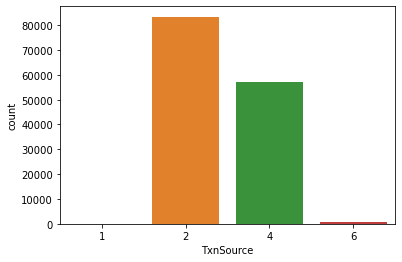

In [12]:
sns.countplot(df['TxnSource'])

### Status

In [51]:
df['Status'].value_counts()
# 1 - inProcess
# 2 - Success
# 3 - Failed
# 4 - Rejected
# 5 - Partial Sucess
# 6 - Cancelled 

2    88279
3    52468
6      221
5       28
1        6
Name: Status, dtype: int64

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

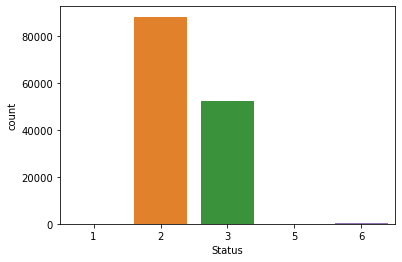

In [11]:
sns.countplot(df['Status'])

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status'>

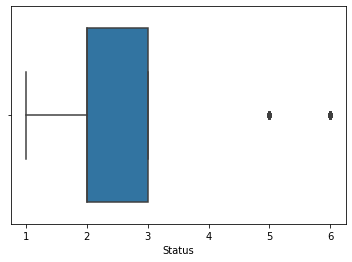

In [65]:
sns.boxplot(df['Status'])

About 50k+ transactions are failing, in one day. It always leaves to some doubt in the mind of end customers. 

### IsReversed

In [52]:
df['IsReversed'].value_counts()
# 1 - inProcess
# 2 - Success
# 3 - Failed
# 4 - Rejected
# 5 - Partial Sucess
# 6 - Cancelled 

2    122153
3     16477
1      2344
0        28
Name: IsReversed, dtype: int64

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsReversed'>

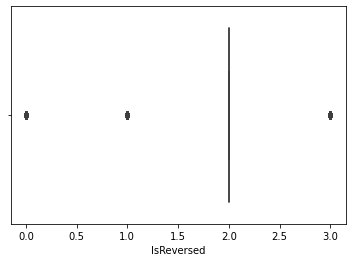

In [66]:
sns.boxplot(df['IsReversed'])

What does 2,3,1,0 signify. If 2 signifies that the transaction is complete, then why it will be reversed.

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsReversed', ylabel='count'>

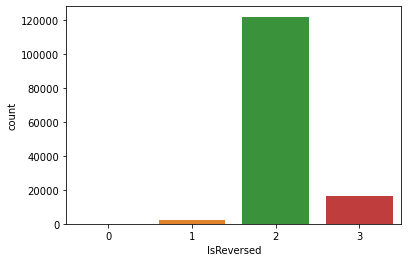

In [13]:
sns.countplot(df['IsReversed'])

### From Transaction Date column, we can calculate the peek time of the day when the most of the transaction is being done.

### From Update On column, we can interpretate that how much time it is taking to update after completion of the transaction.  

### EndPointId

In [58]:
df['EndPointId'].value_counts()

64    66326
51    42778
60    14049
47     6696
6      2687
53     2501
34     2139
10     1544
43     1123
58      434
32      239
48      169
40      100
22       66
61       57
59       31
30       21
3        18
68        6
62        5
7         5
41        3
14        2
4         2
57        1
Name: EndPointId, dtype: int64

What does it signifies ?? it is generating same EndPoint ID many times. is this id is for any particular city or state.  

In [60]:
df['StatusCode'].value_counts()

0         27120
00        24441
U3         7821
91         2883
52         1710
          ...  
BOU008        1
30            1
UY            1
200           1
313           1
Name: StatusCode, Length: 85, dtype: int64

Nothing is clear from this statuscode data.

In [73]:
df1 = df.drop(['AssociateRefTxnId'],axis = 1)
df1

,ATId,BusinessId,DeviceCode,TransactionID,ProductId,PayModeId,Amount,TxnSource,Status,IsReversed,TransactionDate,EndPointId,StatusCode,UpdatedOn
0,143453104,343554,MAO4SLWN,2205150001320000003,49,1,666.0,2,3,1,2022-05-15 00:01:32.453,47,201,2022-05-15 00:01:33.850
1,143453105,343050,MADRKA0,2205150002320000005,51,1,479.0,2,2,2,2022-05-15 00:02:32.047,6,NaN,2022-05-15 00:02:57.303
2,143453106,190431,AS55HE7M,2205150003490000010,3039,1,0.0,2,3,3,2022-05-15 00:03:49.210,64,NaN,2022-05-15 00:03:49.570
3,143453107,190431,AS55HE7M,2205150003580000011,3039,1,0.0,2,3,3,2022-05-15 00:03:58.007,64,NaN,2022-05-15 00:03:58.303
4,143453108,190431,AS55HE7M,2205150004220000012,3039,1,0.0,2,3,3,2022-05-15 00:04:22.217,64,NaN,2022-05-15 00:04:22.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140997,143594104,252236,UUM88NUJ,2205152357380151257,51,1,239.0,2,2,2,2022-05-15 23:57:37.793,6,NaN,2022-05-15 23:57:47.297
140998,143594105,359495,A8A0NS6H,2205152358000151258,3041,1,200.0,2,3,2,2022-05-15 23:57:59.770,64,NaN,2022-05-15 23:58:00.913
140999,143594106,359495,A8A0NS6H,2205152358130151259,3041,1,200.0,2,3,2,2022-05-15 23:58:13.313,64,NaN,2022-05-15 23:58:14.087
141000,143594107,297175,0MD7OSHD,2205152358300151260,3037,1,1.0,2,2,2,2022-05-15 23:58:29.960,64,0,2022-05-15 23:58:34.927


In [74]:
df1.drop(['StatusCode'],axis= 1)

,ATId,BusinessId,DeviceCode,TransactionID,ProductId,PayModeId,Amount,TxnSource,Status,IsReversed,TransactionDate,EndPointId,UpdatedOn
0,143453104,343554,MAO4SLWN,2205150001320000003,49,1,666.0,2,3,1,2022-05-15 00:01:32.453,47,2022-05-15 00:01:33.850
1,143453105,343050,MADRKA0,2205150002320000005,51,1,479.0,2,2,2,2022-05-15 00:02:32.047,6,2022-05-15 00:02:57.303
2,143453106,190431,AS55HE7M,2205150003490000010,3039,1,0.0,2,3,3,2022-05-15 00:03:49.210,64,2022-05-15 00:03:49.570
3,143453107,190431,AS55HE7M,2205150003580000011,3039,1,0.0,2,3,3,2022-05-15 00:03:58.007,64,2022-05-15 00:03:58.303
4,143453108,190431,AS55HE7M,2205150004220000012,3039,1,0.0,2,3,3,2022-05-15 00:04:22.217,64,2022-05-15 00:04:22.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140997,143594104,252236,UUM88NUJ,2205152357380151257,51,1,239.0,2,2,2,2022-05-15 23:57:37.793,6,2022-05-15 23:57:47.297
140998,143594105,359495,A8A0NS6H,2205152358000151258,3041,1,200.0,2,3,2,2022-05-15 23:57:59.770,64,2022-05-15 23:58:00.913
140999,143594106,359495,A8A0NS6H,2205152358130151259,3041,1,200.0,2,3,2,2022-05-15 23:58:13.313,64,2022-05-15 23:58:14.087
141000,143594107,297175,0MD7OSHD,2205152358300151260,3037,1,1.0,2,2,2,2022-05-15 23:58:29.960,64,2022-05-15 23:58:34.927
